In [ ]:
# How to build your model?
# https://www.youtube.com/watch?v=m9Do37a8U-o&t=1s
# https://github.com/bnsreenu/python_for_microscopists/blob/master/139-topology_of_neural_networks.py

In [1]:
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('classic')

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

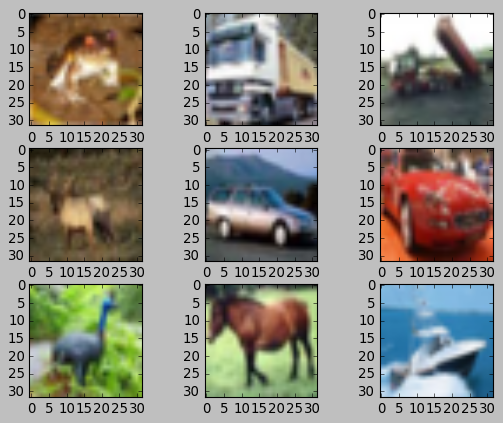

In [3]:
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(X_train[i])

plt.show()

In [4]:
print(X_train.shape)

(50000, 32, 32, 3)


In [5]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
#VGG model with 3 blocks + batch normalization
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(BatchNormalization())

model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())

model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())

model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model1.add(BatchNormalization())

model1.add(Dense(10, activation='softmax'))

In [7]:
opt = SGD(lr=0.001, momentum=0.9)

In [8]:
model1.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_3 (Batch (None, 16, 16, 64)       

In [11]:
# Data augmentation to improve the model

train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)

In [ ]:
history = model1.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), verbose=1)
	# evaluate model
_, acc = model1.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
49984/50000 [============================>.] - ETA: 0s - loss: 1.5282 - accuracy: 0.4720

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()